In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import librosa
from librosa import display
from csi.vendor import simplefast
from matrixprofile import matrixProfile
import IPython.display as ipd
#audio_file = '/dataset/YTCdataset/bo/v0.mp3'
audio_file = '/dataset/mazurkas/mazurka06-4/pid9049-04.mp3'
y, sr = librosa.load(audio_file)
tempo, beats = librosa.beat.beat_track(y=y, sr=sr, trim=False)
seconds = len(y)/sr
samples_per_beat = (60 * sr) / tempo

/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [10]:
def samples_per_beat(feature):
    feature_sr = len(feature[0])/seconds
    return (60 * feature_sr) / tempo

def normalize(x):
    arr = np.array(x)
    arr2 = arr - arr.min()
    return (arr2/np.amax(arr2))


In [11]:
# buscar um hop_length de modo que o chroma não seja mto grande - ~1500 frames roda rápido
chroma_orig = librosa.feature.chroma_cens(y, sr, hop_length=2**9)
#beat_f = librosa.util.fix_frames(beats, x_max=chroma_orig.shape[1])
#sync = librosa.util.sync(chroma_orig, beat_f, aggregate=np.median)
chroma_spb = samples_per_beat(chroma_orig)
chroma = chroma_orig
#chroma = np.array(chroma_orig).T[309:381].T
chroma_length = len(chroma[0])

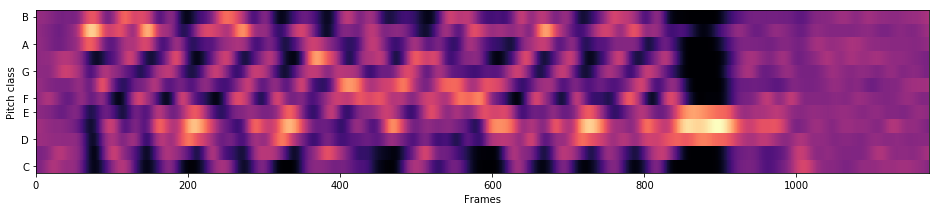

In [12]:
plt.figure(figsize=(16, 3))
display.specshow(chroma, **{'y_axis':'chroma', 'x_axis':'frames'})
plt.show()

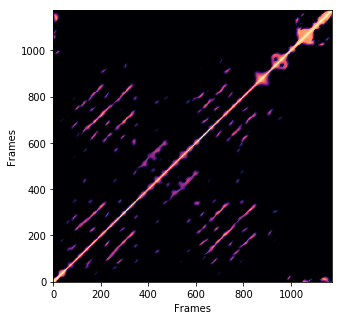

In [13]:
ssm = librosa.segment.recurrence_matrix(chroma, width=1, mode='affinity', sym=True, self=True)
ssm = librosa.segment.path_enhance(ssm, 20, window='hann', n_filters=5)
plt.figure(figsize=(5, 5))
display.specshow(ssm, **{'y_axis':'frames', 'x_axis':'frames'})
plt.show()

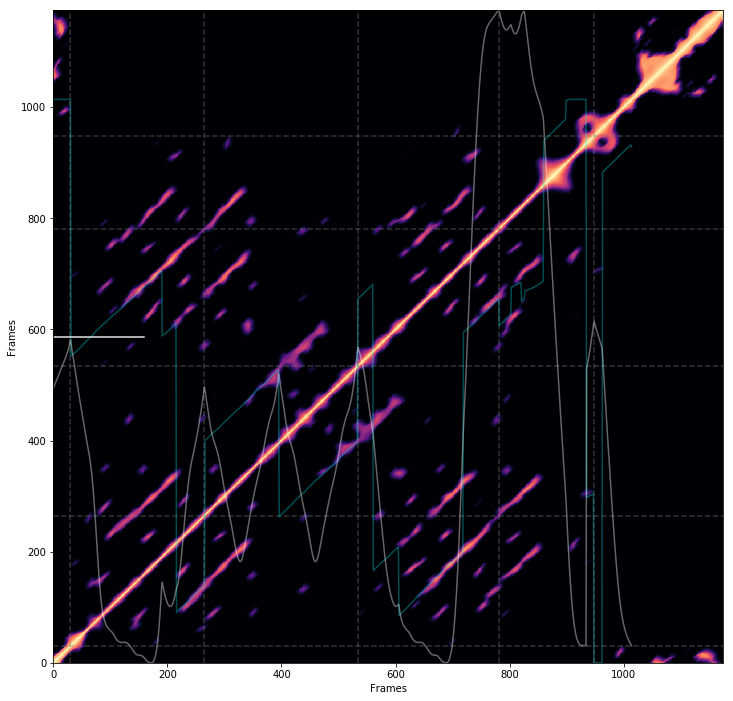

In [14]:
plt.figure(figsize=(12, 12))
display.specshow(ssm, **{'y_axis':'frames', 'x_axis':'frames'})
chroma_length = len(chroma[0])
multiplier = 8
D, I = simplefast.simpleself(chroma, int((multiplier * chroma_spb)))
D2, I2 = simplefast.simpleself(chroma, int((multiplier * chroma_spb)/2))
D3, I3 = simplefast.simpleself(chroma, int((multiplier * chroma_spb)/4))
peaks = scipy.signal.find_peaks(D, **{'height': 0.2 , 'distance': chroma_spb * multiplier })[0]
plt.plot(I, color='cyan', alpha=0.3)
#plt.plot(I2, color='orange', alpha=0.6)
dd1 = normalize(D)*chroma_length 
dd2 = normalize(D2)*chroma_length
dd3 = normalize(D3)*chroma_length
m_size = np.zeros(int(multiplier * chroma_spb)) + chroma_length/2
plt.plot(dd1, color='white', alpha=0.4)
plt.plot(m_size, color='white', alpha=0.9)
#plt.plot(dd2, color='orange', alpha=0.4)
#plt.plot(dd3, color='yellow', alpha=0.4)
plt.vlines(peaks, 0, chroma_length, color='gray', alpha=0.4, linestyle='--', label='Onsets')
plt.hlines(peaks, 0, chroma_length, color='gray', alpha=0.4, linestyle='--', label='Onsets')
plt.show()

In [15]:
S = np.arange(chroma_length)
for idx in range(len(I)):
    S[I[idx]] = min(S[I[idx]], idx)
    S[idx] = min(S[idx], I[idx])
    #S[idx] = 3*chroma_length/4 if I[idx] > idx else chroma_length/4


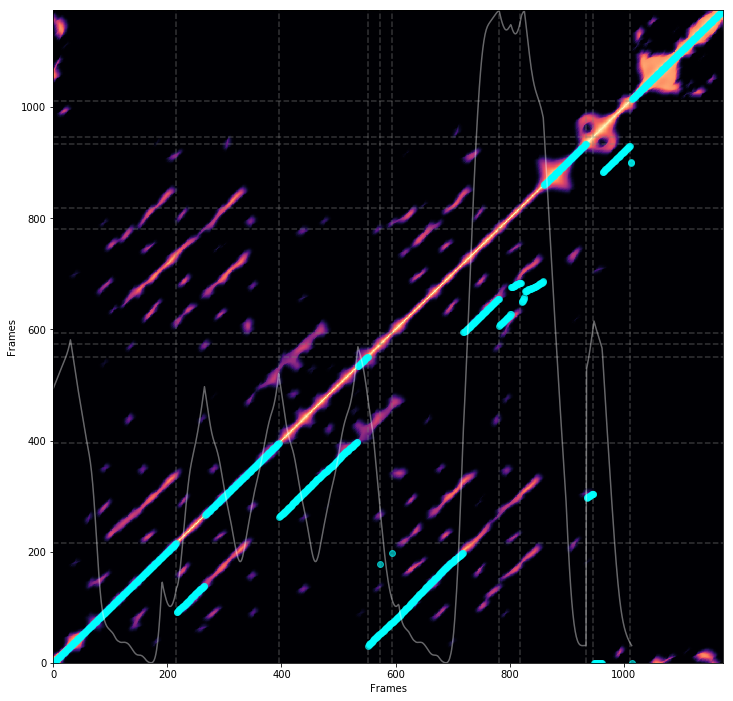

In [19]:
plt.figure(figsize=(12, 12))
display.specshow(ssm, **{'y_axis':'frames', 'x_axis':'frames'})
chroma_length = len(chroma[0])
peaks2 = scipy.signal.find_peaks(S, **{'height': 0.05 , 'distance': 3 })[0]
plt.plot(S, 'o',color='cyan', alpha=0.6)
dd1 = normalize(D)*chroma_length
plt.plot(dd1, color='white', alpha=0.4)
plt.vlines(peaks2, 0, chroma_length, color='gray', alpha=0.4, linestyle='--', label='Onsets')
plt.hlines(peaks2, 0, chroma_length, color='gray', alpha=0.4, linestyle='--', label='Onsets')
plt.show()

In [17]:
peaks

array([ 30, 265, 534, 781, 948])

ValueError: operands could not be broadcast together with shapes (0,) (1070,) 

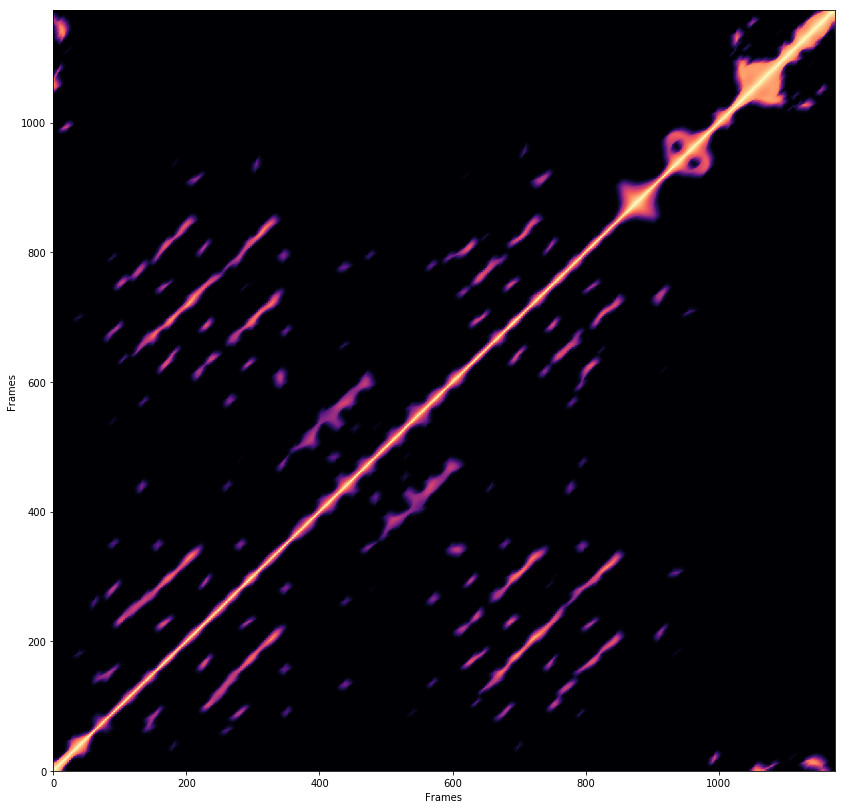

In [18]:

#for m in M:    
#    profiles.append(simplefast.simpleself(chroma, int(m * chroma_spb)))

plt.figure(figsize=(14, 14))
display.specshow(ssm, **{'y_axis':'frames', 'x_axis':'frames'})

multiplier = 64
D, I = simplefast.simpleself(chroma, int(multiplier * chroma_spb))
peaks = scipy.signal.find_peaks(D, **{'height': 0. , 'distance': 10 })[0]
plt.plot(normalize(D)*chroma_length, color='yellow')
plt.vlines(peaks, 0, chroma_length, color='g', alpha=0.9, linestyle='--', label='Onsets')
plt.show()
print(peaks)

In [120]:
multiplier * chroma_spb

144.0185164174363

In [77]:
tempo

151.99908088235293

ValueError: operands could not be broadcast together with shapes (2633,) (2945,) 